Research questions
1. What is the total distance route distance for DC metro
2. What is the average distance from the affordable 0-30% units to the metro bus route
3. What is the average distance to the closest bus stop?

In [2]:


# Call your main function

# Import dependencies
import pandas as pd
import os
os.getcwd()

'/content'

In [3]:
# Import dependencies
import pandas as pd
import os
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
os.chdir('/content/drive/MyDrive/PYTHON PROJECT')
os.listdir()

['Affordable_Housing (2).csv',
 'Metro_Bus_Stops.csv',
 'Metro_Bus_Lines',
 'Washington_DC_Boundary',
 'Downloads',
 'Metro_Bus_Stops',
 'kx-washington-dc-building-footprints-SHP',
 'kx-washington-dc-floodplains-SHP',
 'Affordable_Housing 3',
 'Affordable_Housing (2).gsheet',
 'map.html']

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [7]:
#Define coordinate systems
UTM18 = 26918
WGS84 = 4326

# Read the shapefiles
dcboundary = gpd.read_file('/content/drive/MyDrive/PYTHON PROJECT/Washington_DC_Boundary/Washington_DC_Boundary.shp')
busroute = gpd.read_file('/content/drive/MyDrive/PYTHON PROJECT/Metro_Bus_Lines/Metro_Bus_Lines.shp')
shapefilestops = gpd.read_file('/content/drive/MyDrive/PYTHON PROJECT/Metro_Bus_Stops/Metro_Bus_Stops.shp')
house = gpd.read_file('/content/drive/MyDrive/PYTHON PROJECT/Affordable_Housing 3/Affordable_Housing.shp')

# Project all GeoDataFrames to UTM zone 18N (EPSG code 26918)
dcboundary = dcboundary.to_crs(UTM18)
busroute = busroute.to_crs(UTM18)
shapefilestops = shapefilestops.to_crs(UTM18)
house = house.to_crs(UTM18)

In [9]:
filtered_house = house[house['AFFORDABLE'] > 1]
# #filtered_house.plot()

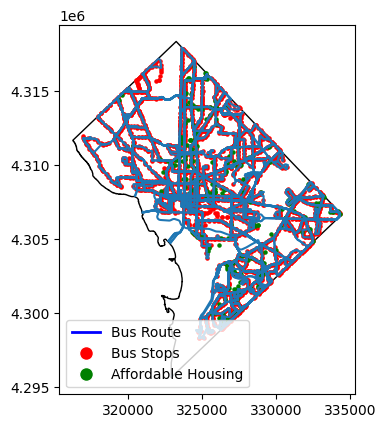

In [29]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


# Define the legend labels and colors
legend_labels = ['Bus Route', 'Bus Stops', 'Affordable Housing']
legend_colors = ['blue', 'red', 'green']

# Create a new plot
fig, ax = plt.subplots()

# Plot the DC Boundary shapefile  with outline
dcboundary.plot(ax=ax, edgecolor='black', facecolor='none')

# Clip bus routes layer to the boundary of DC
clipped_shapefile2 = gpd.clip(busroute, dcboundary)

# Plot the clipped bus route
clipped_shapefile2.plot(ax=ax)

# Clip bus stop feature to the boundary of DC
clipped_shapefilestops = gpd.clip(shapefilestops, dcboundary)

# Plot the clipped bus stops
clipped_shapefilestops.plot(ax=ax, color='red', markersize=5)

clipped_filtered_house = gpd.clip(filtered_house, dcboundary)
clipped_filtered_house.plot(ax=ax, color='green', markersize=5)


# Add legend
legend_elements = [
    Line2D([0], [0], color='blue', lw=2, label='Bus Route'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Bus Stops'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Affordable Housing')
]
ax.legend(handles=legend_elements)

# Add north arrow
ax.annotate('N', xy=(0.5, 0.95), xytext=(0.5, 1.0), arrowprops=dict(facecolor='black', shrink=0.05))


# Show the plot
plt.show()

Total route distance

In [12]:
busroute_utm = busroute.to_crs(epsg=UTM18)
# Calculate the total length of all bus routes in UTM zone 18N
total_length_utm = busroute_utm.geometry.length.sum()

print("Total length of bus routes in UTM zone 18N (in meters):", total_length_utm)

Total length of bus routes in UTM zone 18N (in meters): 9304025.958373874


Average distance to a bus route

In [13]:
import numpy as np

In [16]:
# Calculate the distance from each point in clipped_filtered_house to the nearest point on the bus route
distances = clipped_filtered_house.geometry.apply(lambda point: clipped_shapefile2.distance(point))
# Take the mean of the distances
average_distance = np.mean(distances)

print("Average distance from clipped_filtered_house to clipped bus route:", average_distance)

Average distance from clipped_filtered_house to clipped bus route: 5191.476013154117


Closet distance to a bust stop

In [17]:
# Calculate the distance from each point in clipped_filtered_house to the nearest point on the shapefilestops
distances_to_stops = clipped_filtered_house.geometry.apply(lambda point: clipped_shapefilestops.distance(point))

# Take the mean of the distances
average_distance_to_stops = np.mean(distances_to_stops)

print("Average distance from clipped_filtered_house to nearest shapefile stops:", average_distance_to_stops)

Average distance from clipped_filtered_house to nearest shapefile stops: 6739.9245147125375
